In [1]:
from gensim import corpora, models, topic_coherence
from gensim.models.coherencemodel import CoherenceModel
import re
import gensim
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from stop_words import get_stop_words
import numpy as np

np.random.seed(2018)

In [2]:
x = pd.read_csv('/home/rubisco/Desktop/insight/search/bitcoin.csv', engine='python')
x

,created_at,id,json,mentions,text,username
0,Mon Jan 28 00:48:55 +0000 2019,1089686727105675269,"{u'contributors': None, u'truncated': False, u...",[],Privacy-Focused Wasabi Wallet Adds Mixing for ...,dden_official
1,Mon Jan 28 00:48:52 +0000 2019,1089686712308121600,"{u'contributors': None, u'truncated': False, u...","[{u'id': 911153762491879425, u'indices': [3, 1...",RT @e_Chat_ICO: We decided to translate e-Chat...,AlexanderRomer0
2,Mon Jan 28 00:48:51 +0000 2019,1089686709556654081,"{u'contributors': None, u'truncated': False, u...","[{u'id': 3249465024, u'indices': [3, 18], u'id...",RT @CryptoShillNye: Currency is a form of trus...,RforceIntegra
3,Mon Jan 28 00:48:51 +0000 2019,1089686707077857281,"{u'contributors': None, u'truncated': True, u'...",[],"#Litecoin es una #Criptomoneda que, a diferenc...",coinvestoficial
4,Mon Jan 28 00:48:50 +0000 2019,1089686705282711554,"{u'contributors': None, u'truncated': False, u...","[{u'id': 911153762491879425, u'indices': [3, 1...",RT @e_Chat_ICO: The Reuters Endorsed e-Chat as...,AliciaR84333364
5,Mon Jan 28 00:48:48 +0000 2019,1089686696323674112,"{u'contributors': None, u'truncated': False, u...","[{u'id': 911153762491879425, u'indices': [3, 1...",RT @e_Chat_ICO: e-Chat Whitepaper Update - Ver...,yeisonl06710079
6,Mon Jan 28 00:48:48 +0000 2019,1089686694448766976,"{u'contributors': None, u'truncated': True, u'...","[{u'id': 3434656229, u'indices': [0, 16], u'id...",@simoncarlkoeber @Slocum @2aeugigerZyklop @Ral...,Joe130978
7,Mon Jan 28 00:48:47 +0000 2019,1089686692334895111,"{u'contributors': None, u'truncated': False, u...","[{u'id': 911153762491879425, u'indices': [3, 1...",RT @e_Chat_ICO: e-Chat Whitepaper Update - Ver...,lervin_lopez
8,Mon Jan 28 00:48:47 +0000 2019,1089686690522791936,"{u'contributors': None, u'truncated': False, u...","[{u'id': 1028640431792369664, u'indices': [3, ...",RT @Edinarcoin_ID: Starbucks Akan Menerima Bit...,yusmaryfarias
9,Mon Jan 28 00:48:44 +0000 2019,1089686677755441152,"{u'contributors': None, u'truncated': True, u'...",[],Long/Short Bitcoin swings with up to 100x Leve...,DianneNeal0


In [3]:
doc_set = x.loc[: , "text"]

In [4]:
p_stemmer = PorterStemmer()
en_stop = get_stop_words('en')
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

# compile sample documents into a list
texts = []
for doc in doc_set:
    if doc != None:
        raw = doc.lower() #lowercase all letters
        tokens = tokenizer.tokenize(raw) #divide document into list of strings
        stopped_tokens = [i for i in tokens if not i in en_stop] #remove common words
        #stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens] #combine words of identical meanings
        lemmatized_tokens = [wordnet_lemmatizer.lemmatize(i) for i in stopped_tokens]
        texts.append(lemmatized_tokens)

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [5]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [6]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [14]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"bitcoin" + 0.007*"tron" + 0.007*"stellar" + 0.007*"cardano" + 0.007*"eos" + 0.007*"sv" + 0.007*"analysis" + 0.006*"ripple" + 0.006*"jan" + 0.006*"cash"
Topic: 1 Word: 0.009*"crypto" + 0.007*"lightning" + 0.006*"rt" + 0.006*"bitcoin" + 0.005*"coingatecom" + 0.005*"energy" + 0.005*"network" + 0.005*"co" + 0.005*"http" + 0.005*"t"
Topic: 2 Word: 0.016*"amp" + 0.009*"buying" + 0.009*"now" + 0.009*"register" + 0.009*"start" + 0.009*"selling" + 0.008*"last" + 0.006*"cryptocurrency" + 0.005*"ltc" + 0.005*"elixiumcapital"
Topic: 3 Word: 0.011*"usd" + 0.010*"r" + 0.009*"gt" + 0.006*"ltk" + 0.006*"bs" + 0.006*"0" + 0.006*"mercadobitcoin" + 0.006*"btc" + 0.005*"1" + 0.005*"2019"
Topic: 4 Word: 0.010*"0" + 0.009*"ltc" + 0.007*"hour" + 0.005*"litecoin" + 0.005*"1" + 0.004*"31" + 0.004*"t" + 0.004*"co" + 0.004*"http" + 0.004*"price"


In [7]:
example = lda_model_tfidf[corpus]

NameError: name 'lda_model_tfidf' is not defined

In [34]:
def compute_coherence_values(dictionary,corpus,texts,limit,start=1):
    coherence_values=[]
    model_list=[]
    for num_topics in range(start,limit,10):
        model=gensim.models.LdaMulticore(corpus,num_topics=num_topics,id2word=dictionary,
                                          passes=2,workers=4)
        model_list.append(model)
        coherencemodel=CoherenceModel(model=model,texts=texts,dictionary=dictionary,coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [35]:
coherence = compute_coherence_values(dictionary, corpus, texts, 100)

In [36]:
model_list = coherence[0]
coherence_values = coherence[1]

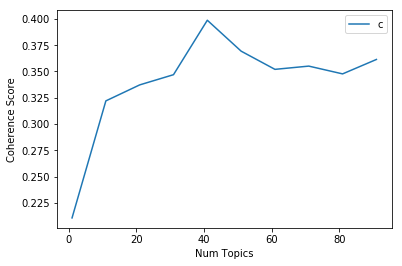

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
limit=100;start=1;
x=range(start,limit,10)
plt.plot(x,coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'),loc='best')
plt.show()